<h1 style = 'text-align: center'><b>Clustering With Iris Dataset</b></h1>

<h2><b>1. Import libraries</b></h2>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.metrics import mean_squared_error
import tensorflow as tf

<h3><b>2. Create neccessary functions for K-Means clustering</b></h3>

In [5]:
# Initialize the initial centers
def kmeans_init_centers(X, K):
    # Randomly choose the first center
    centers = [X[np.random.choice(X.shape[0])]]
    
    # Choose the remaining centers using K-means++
    for _ in range(1, K):
        # Compute squared distances from each point to the nearest center
        D2 = np.array([min([np.linalg.norm(x - c)**2 for c in centers]) for x in X])
        
        # Calculate probabilities
        probs = D2 / D2.sum()
        
        # Choose the next center randomly based on probabilities
        next_center = X[np.random.choice(X.shape[0], p=probs)]
        
        # Add the new center to the list of centers
        centers.append(next_center)
    
    return np.array(centers)

# Assign new labels to points when the center is known
def kmeans_assign_labels(X, centers):
    # calculate pairwise distances btw data and centers
    D = cdist(X, centers)
    # return index of the closest center
    return np.argmin(D, axis = 1)

# Update the new centers based on the data that has just been labeled.
def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster
        Xk = X[labels == k, :]
        # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

# Check the stopping condition of the algorithm
def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) == set([tuple(a) for a in new_centers]))

def kmeans_compute_wcss(X, labels, centers):
    wcss = 0
    for k in range(len(centers)):
        # Collect all points assigned to the k-th cluster
        Xk = X[labels == k, :]
        # Calculate squared Euclidean distance from each point in the cluster to its center
        dist = cdist(Xk, [centers[k]], metric='euclidean')
        wcss += np.sum(dist ** 2)
    return wcss

<h3><b>3. Combine all function to create k-means algorithm</b></h3>

In [6]:
def my_kmeans(X, K):
    # initialize the initial state with centers, labels and iterations
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0
    
    # conduct clustering until has no difference between previous and current centers
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

<h3><b>4. Load the MNIST dataset</b></h3>

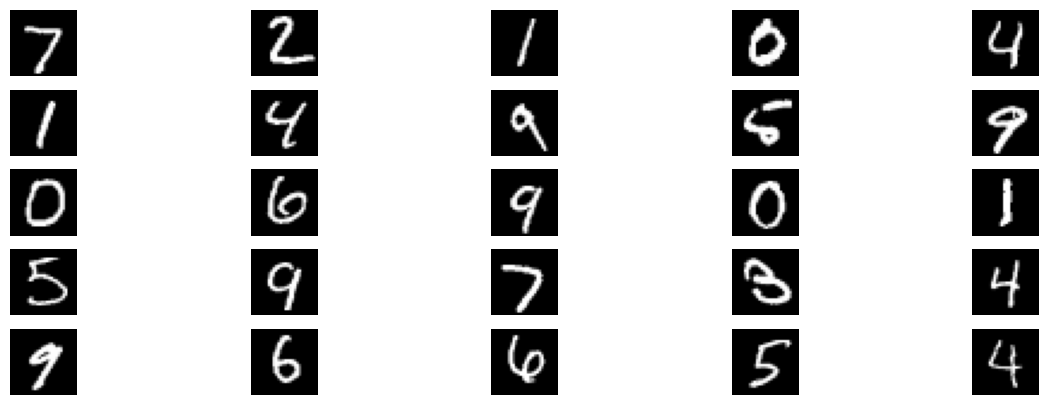

In [13]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
plt.figure(figsize=(15, 5))

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    # plt.title(f"Label: {y_test[i]}")
    plt.axis('off')
plt.show()    

Chuẩn hóa dữ liệu về thành vector

In [25]:
X = np.asarray(X_test)[:1000,:]/256.0

<h3><b>5.The Elbow method</b></h3>


In [26]:
#Finding the optimum number of clusters for k-means classification
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 500, n_init='auto', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
#plot with grid lines
plt.figure(figsize=(15,5))
plt.plot(range(1, 11), wcss,  marker='o', linestyle='-', color='purple')
plt.grid()
plt.xticks(range(1, 11))  
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

print(wcss)

ValueError: Found array with dim 3. KMeans expected <= 2.

<h3><b>6. Apply our K-means algorithm</b></h3>

In [370]:
(centers, labels, it) = my_kmeans(X, 3)
cluster_centers = centers[-1]
cluster_labels = labels[-1]

print('Centers found by our algorithm:')
print(cluster_centers)

Centers found by our algorithm:
[[5.91568627 2.76470588 4.26470588 1.33333333 1.01960784]
 [5.006      3.428      1.462      0.246      0.        ]
 [6.62244898 2.98367347 5.57346939 2.03265306 2.        ]]


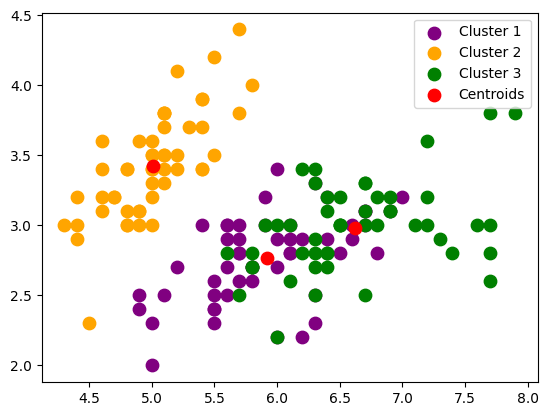

In [371]:
#Visualising the clusters
plt.scatter(X[cluster_labels == 0, 0], X[cluster_labels == 0, 1], s = 80, c = 'purple', label = 'Cluster 1')
plt.scatter(X[cluster_labels == 1, 0], X[cluster_labels == 1, 1], s = 80, c = 'orange', label = 'Cluster 2')
plt.scatter(X[cluster_labels == 2, 0], X[cluster_labels == 2, 1], s = 80, c = 'green', label = 'Cluster 3')

#Plotting the centroids of the clusters
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s = 80, c = 'red', label = 'Centroids')

plt.legend()

<h3><b>7. Compare with Scikit-learn library</b></h3>

In [372]:

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 500, n_init = 'auto', random_state = 0)
y_kmeans = kmeans.fit_predict(X)
print(kmeans.cluster_centers_)

[[5.9   2.76  4.25  1.326 1.02 ]
 [5.006 3.428 1.462 0.246 0.   ]
 [6.624 2.984 5.562 2.026 1.98 ]]


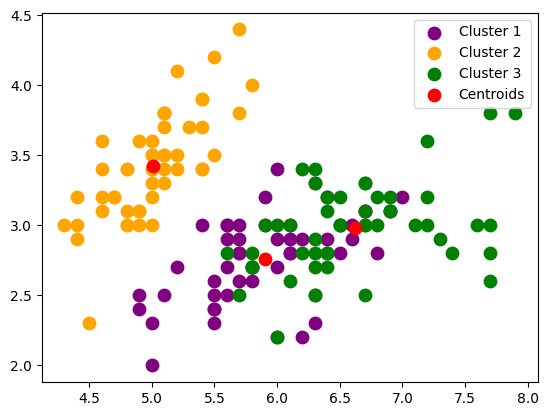

In [373]:
#Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 80, c = 'purple', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 80, c = 'orange', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 80, c = 'green', label = 'Cluster 3')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 80, c = 'red', label = 'Centroids')

plt.legend()

<h3><b>8. Error validation using MSE</b></h3>

In [374]:
# Compute Mean Squared Error (MSE) between custom centers and sklearn centers
mse_centers = mean_squared_error(cluster_centers, kmeans.cluster_centers_)
print(f"Mean Squared Error (MSE) between centers: {mse_centers:.4f}")


Mean Squared Error (MSE) between centers: 0.0001
